In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df_cars = pd.read_csv("/Users/uhith/Desktop/ML/Regression/used_cars_data.csv")

In [4]:
pd.options.display.max_columns = None

In [5]:
# Glance at the data
np.random.seed(12)
df_cars.sample(n=100)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4283,4283,Hyundai Verna 1.6 SX CRDI (O) AT,Pune,2014,57539,Diesel,Automatic,First,22.32 kmpl,1582 CC,126.32 bhp,5.0,NaN,7.75
1224,1224,Maruti Zen VX,Jaipur,1999,70000,Petrol,Manual,Second,17.3 kmpl,993 CC,60 bhp,5.0,NaN,0.77
3346,3346,Volkswagen Vento Diesel Highline,Pune,2012,115000,Diesel,Manual,Second,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,4.33
268,268,Maruti A-Star Vxi,Pune,2010,67000,Petrol,Manual,First,19.0 kmpl,998 CC,66.1 bhp,5.0,NaN,2.00
481,481,Ford Figo Diesel EXI,Chennai,2011,75000,Diesel,Manual,Second,20.0 kmpl,1399 CC,68 bhp,5.0,NaN,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5760,5760,Hyundai i10 Sportz 1.1L,Pune,2013,84000,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0,NaN,2.95
2452,2452,Hyundai Xcent 1.2 CRDi E Plus,Mumbai,2017,69000,Diesel,Manual,First,25.4 kmpl,1186 CC,73.97 bhp,5.0,NaN,3.55
613,613,Mahindra Bolero ZLX BSIII,Kolkata,2000,124000,Diesel,Manual,First,13.6 kmpl,2523 CC,63 bhp,7.0,NaN,1.95
1488,1488,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,NaN,2.65


In [6]:
# What's the size of the data?
df_cars.shape

(7253, 14)

In [7]:
# What are the data types
df_cars.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [8]:
# drop S.No since we can use ID provied by pandas
df_cars.drop('S.No.', axis=1, inplace=True)

In [9]:
# Does the data have any missing values?
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


#### Clearly Mileage, Engine, Power, Seats, New_Price, Price columns have missing values. New_Price has a lot of missing values

### Data Preprocessing

In [10]:
# Function to convert 'Mileage', 'Engine', 'Power' to numbers
def object_to_number(x):
    if isinstance(x, str):
        value = str(x).split(" ")[0]
        if value != 'null':
            try:
                return float(value)
            except:
                print(f'Found some garbage : {value}')
        else:
            return np.NaN
    else:
        return np.NaN

In [11]:
# Convert columns 'Mileage', 'Engine', 'Power' to numbers
for col in ['Mileage', 'Engine', 'Power']:
    df_cars[col] = df_cars[col].apply(object_to_number)

In [12]:
# Extract brand variable from the car name
df_cars['Brand'] = df_cars['Name'].apply(lambda x:x.split(" ")[0])

In [13]:
# I want to convert Location, Fuel_type, Transmission, Owner_Type, Seats to categorical variables
for col in ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type','Seats']:
    df_cars[col] = df_cars[col].astype('category')

In [14]:
df_cars.dtypes

Name                   object
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                category
New_Price              object
Price                 float64
Brand                category
dtype: object

In [15]:
# Look at the value counts of categorical variables
num_display=10
cat_variables = ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type','Seats']
for col in cat_variables:
    value_counts = df_cars[col].value_counts(dropna=False)
    print(value_counts[:num_display])
    if len(value_counts) > num_display:
        print(f'Printing only top {num_display} value counts.......')
    print("\n")

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Name: Brand, dtype: int64
Printing only top 10 value counts.......


Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Printing only top 10 value counts.......


Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64


Manual       5204
Automatic    2049
Name: Transmission, dtype: int64


First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64


5.0     6047
7.0      796
8.0      170
4.0      119
NaN       53
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dty

####  Missing values

In [16]:
df_cars.isna().sum(axis=0)

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Brand                   0
dtype: int64

In [17]:
# Number of rows with missing values
df_cars.isna().sum(axis=1).value_counts()

1    5232
2    1125
0     823
4      36
3      27
5      10
dtype: int64

##### There are a lot of rows with one missing value. We can see that New_Price has a lot of missing values (6247 null values out of 7243 rows). I think it's better to just remove New_Price column

In [18]:
df_cars.drop(columns = ['New_Price'], axis=1, inplace=True)

In [19]:
# Now check the number of rows with missing values
df_cars.isna().sum(axis=1).value_counts()

0    5872
1    1308
3      36
2      27
4      10
dtype: int64

In [20]:
# Impute the missing values of numeric columns with median (Except Price which is a dependent variable)
for col in ['Mileage', 'Engine', 'Power']:
    df_cars[col].fillna(value=df_cars[col].median(), inplace=True)

In [21]:
# Impute the missing values of categorical variable with mode
df_cars['Seats'].fillna(value=df_cars['Seats'].mode()[0], inplace=True)

In [22]:
# Now check the missing values
df_cars.isna().sum(axis=0)

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Brand                   0
dtype: int64

#### We are now free of missing values in independent variables. We can remove the rows with Price = np.Nan after the visuaization.

### Visualization

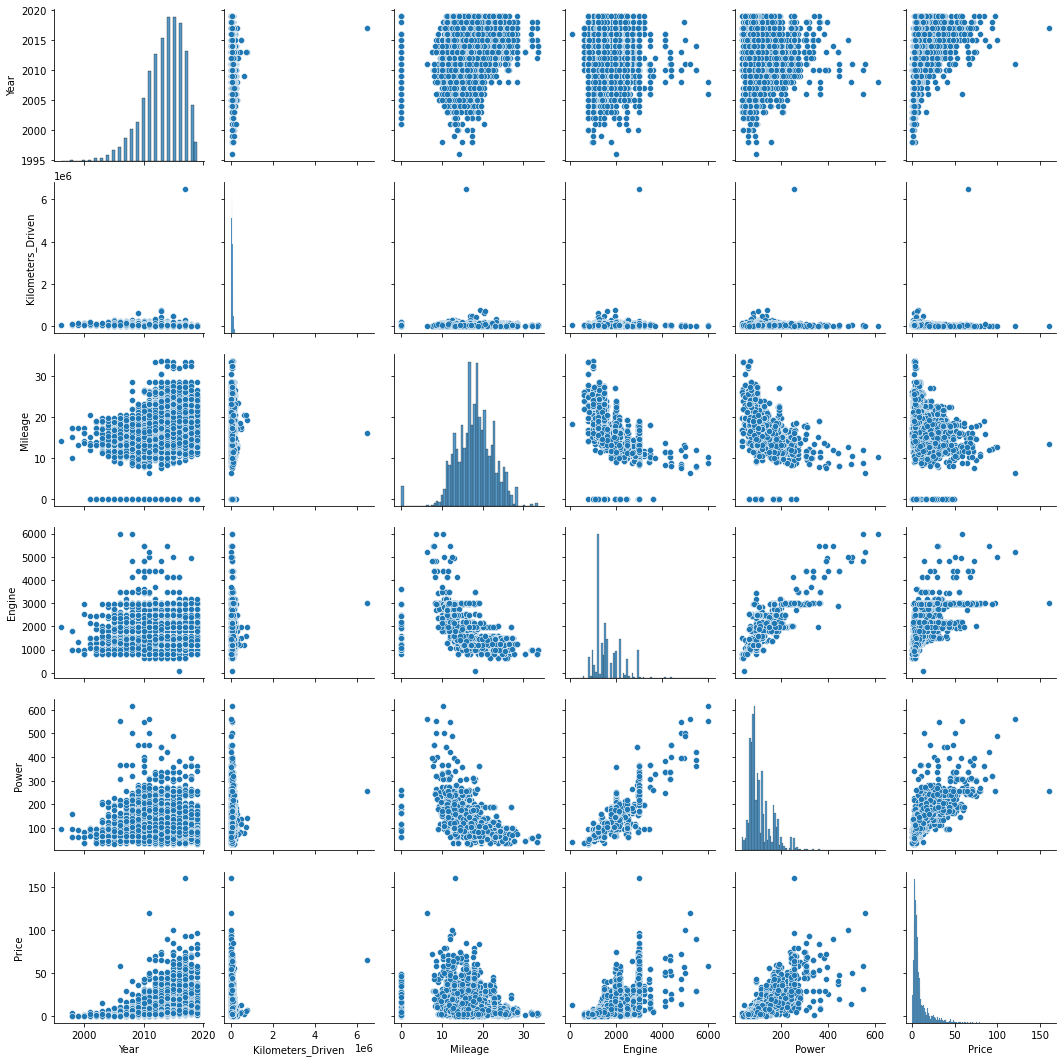

In [23]:
## First, blindly check the pair plots
sns.pairplot(df_cars)

#### Univariate analysis

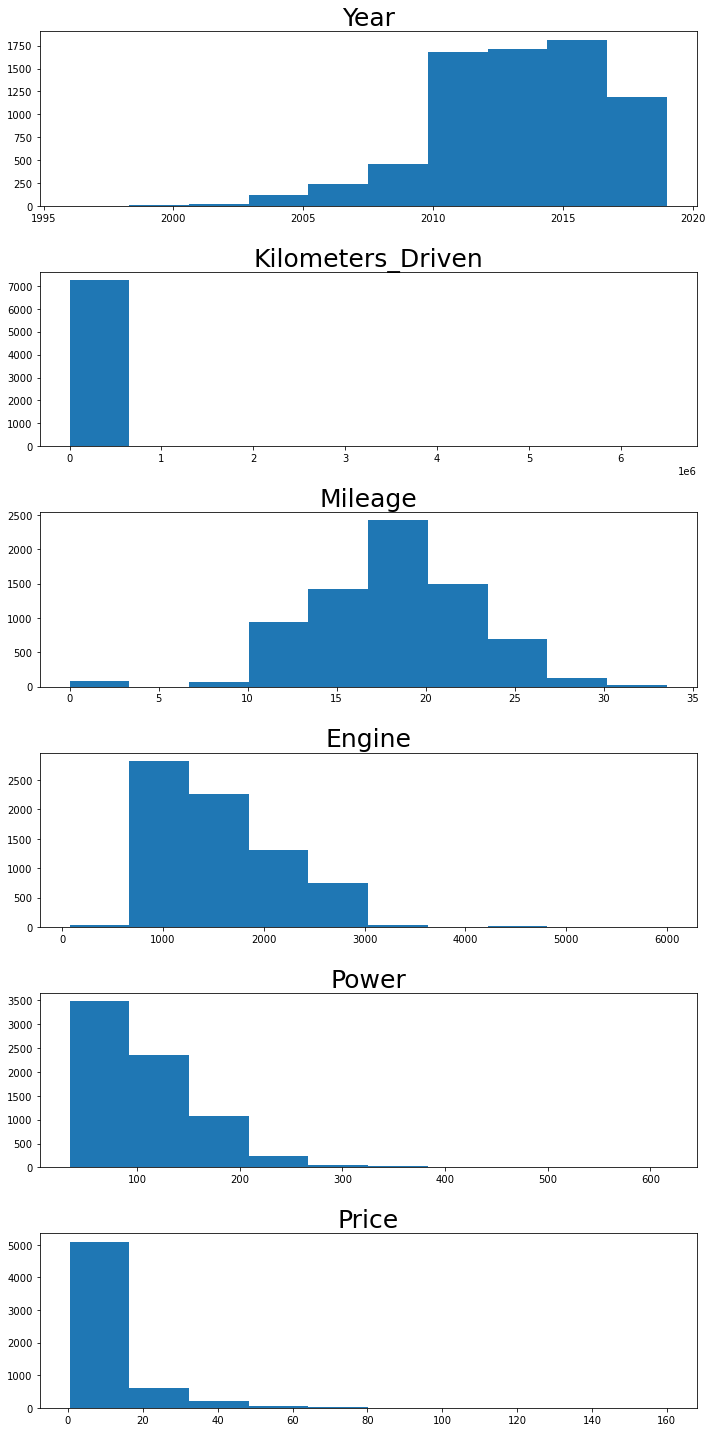

In [24]:
# Let's check the distribution of all the numerical variables in the data
numeric_col = df_cars.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(10,20))
for i in range(len(numeric_col)):
    plt.subplot(6,1,i+1)
    plt.hist(df_cars[numeric_col[i]])
    plt.tight_layout()
    plt.title(numeric_col[i],fontsize=25)
    
plt.show()    

In [25]:
df_cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7253.0,18.141586,4.561567,0.00,15.17,18.16,21.10,33.54
Engine,7253.0,1615.789742,593.475257,72.00,1198.00,1493.00,1968.00,5998.00
Power,7253.0,112.312448,52.922581,34.20,77.00,94.00,138.03,616.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


#### From the graphs and stats, it is clearly visible that the variables Kilometers_Driven, Power,  Engine, Price are right skewed. Mileage is somewhat normally distributed. 

#### Applying log transformation on the variables Kilometers_Driven, Power, Engine, Price since they are skewed.

In [26]:
# Applying log transformation on the variables Kilometers_Driven, Power, Engine, Price since they are skewed.
for col in ['Price', 'Power', 'Engine']:
    df_cars[col] = np.log2(df_cars[col] + 1)
df_cars['Kilometers_Driven'] = np.log10(df_cars['Kilometers_Driven'] + 1)    

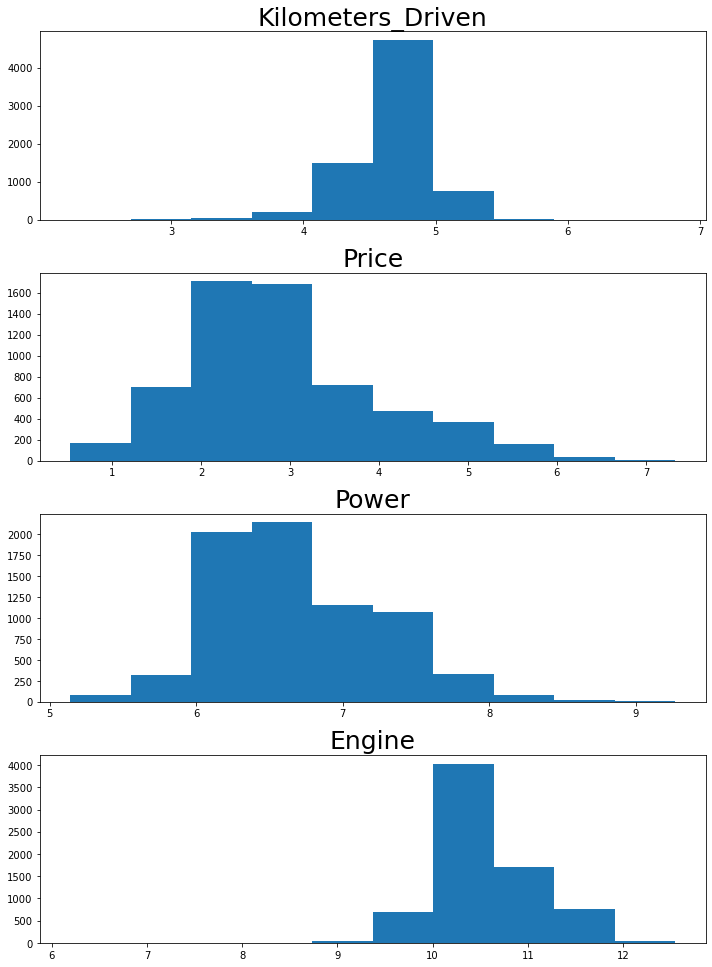

In [27]:
# Let's check the distribution after log transformation
numeric_col = ['Kilometers_Driven', 'Price', 'Power', 'Engine']
plt.figure(figsize=(10,20))
for i in range(len(numeric_col)):
    plt.subplot(6,1,i+1)
    plt.hist(df_cars[numeric_col[i]])
    plt.tight_layout()
    plt.title(numeric_col[i],fontsize=25)
    
plt.show()  

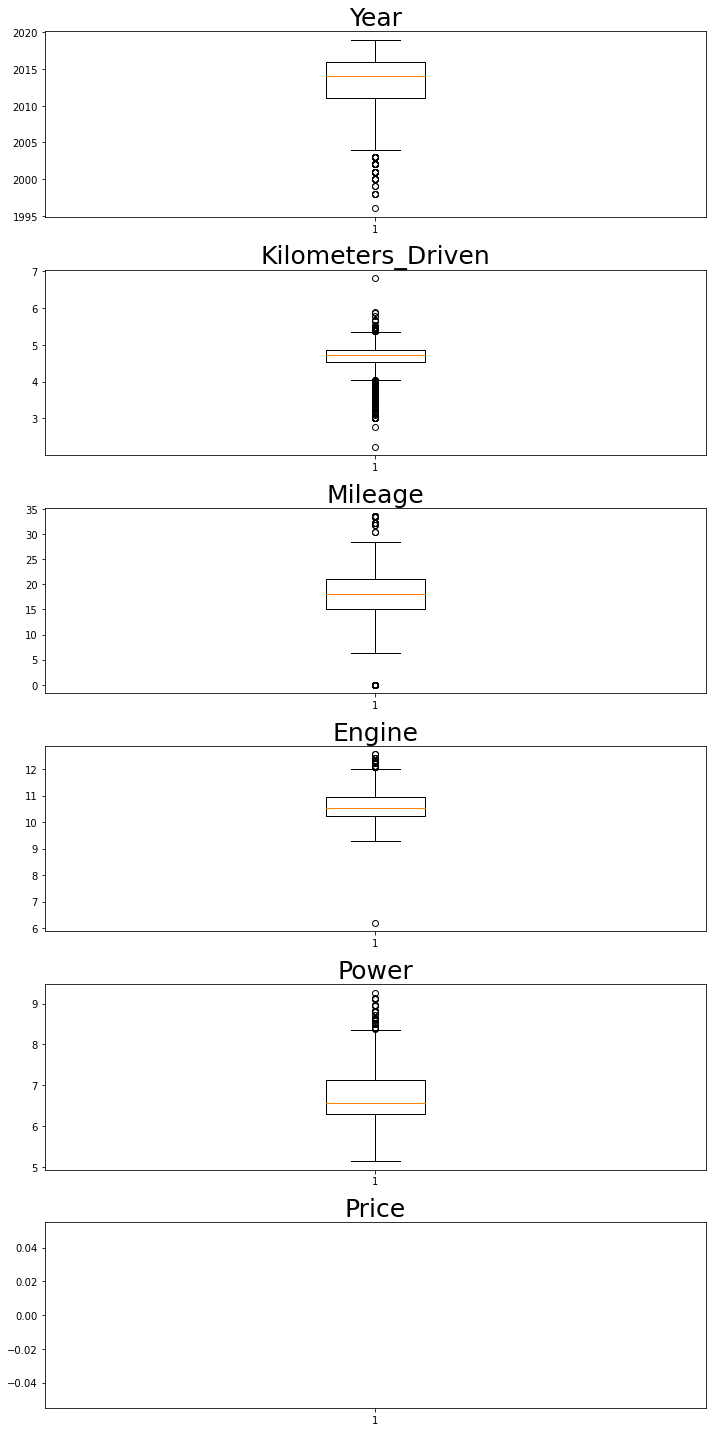

In [28]:
# Outlier detection using box plots
numeric_col = df_cars.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(10,20))
for i in range(len(numeric_col)):
    plt.subplot(6,1,i+1)
    plt.boxplot(df_cars[numeric_col[i]])
    plt.tight_layout()
    plt.title(numeric_col[i],fontsize=25)
    
plt.show()    

#### Bivariate analyses

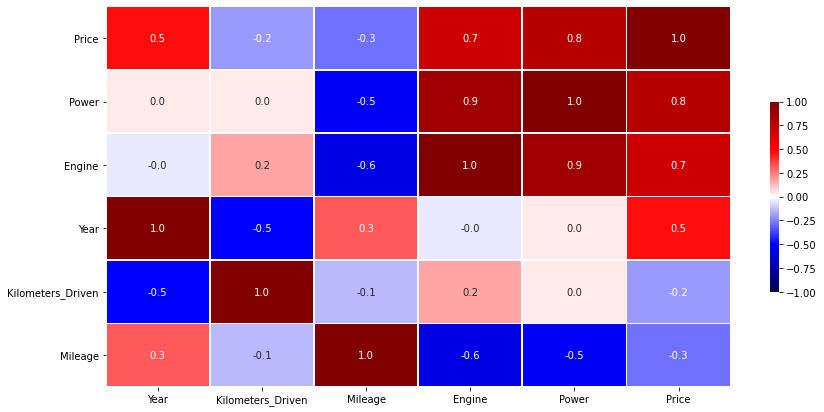

In [29]:
# Correlation
corr = df_cars[numeric_col].corr().sort_values(by=['Price'], ascending=False)
fig, ax = plt.subplots(figsize=(14, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

##### Observations
1. Price is highly positively correlated with Engine and Power
2. Power is highly positively correlated with Engine - 0.9 
3. Power/Engine are negatively correlated with Mileage
4. Kilometers_Driven doesn't have correlation with any other variable. 

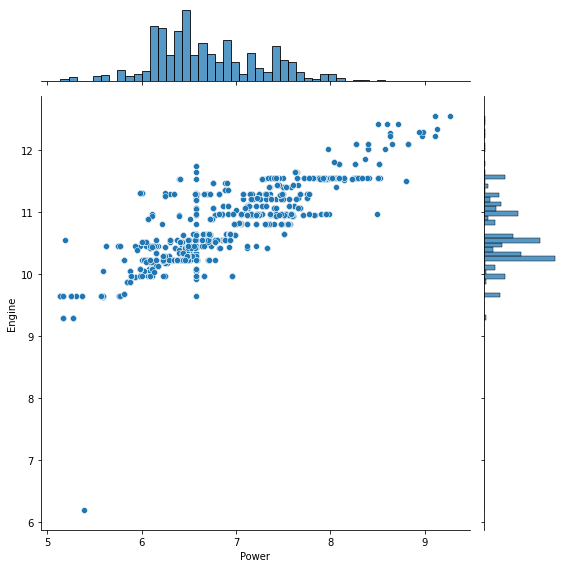

In [30]:
# Engine vs Power 
sns.jointplot(data=df_cars, x='Power', y='Engine', height=8)

1. Engine and Power seems to be highy positively correlated. We could consider removing one of the columns from the dataset to avoid the multicollinearity issue 

#### Graphs of variables which are correlated with dependent variable Price

##### Power vs price

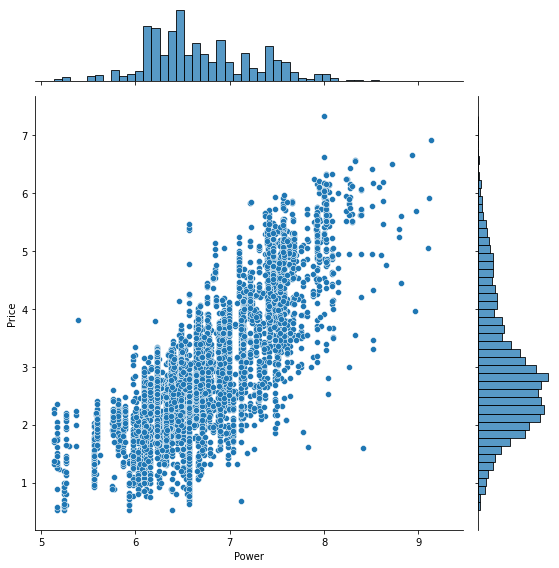

In [31]:
sns.jointplot(data=df_cars, x='Power', y='Price', height=8)

##### Power vs Price vs Fuel_Type

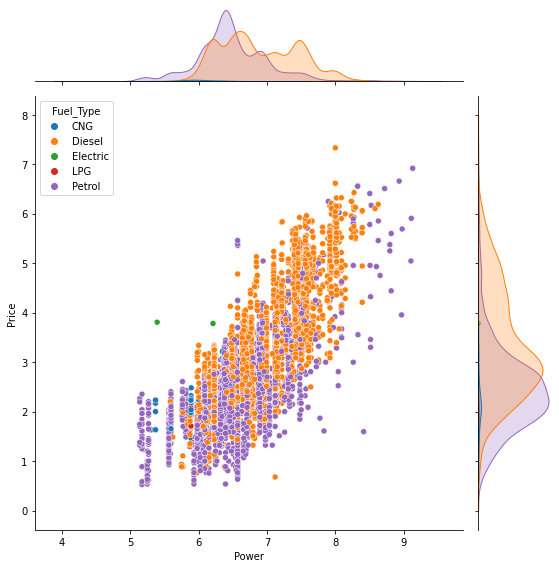

In [32]:
sns.jointplot(data=df_cars, x='Power', y='Price', hue='Fuel_Type', height=8)

##### 
1. A few petrol cars have higher power
2. Majority of cheaper cars are petrol cars

##### Power vs Price vs Transmission

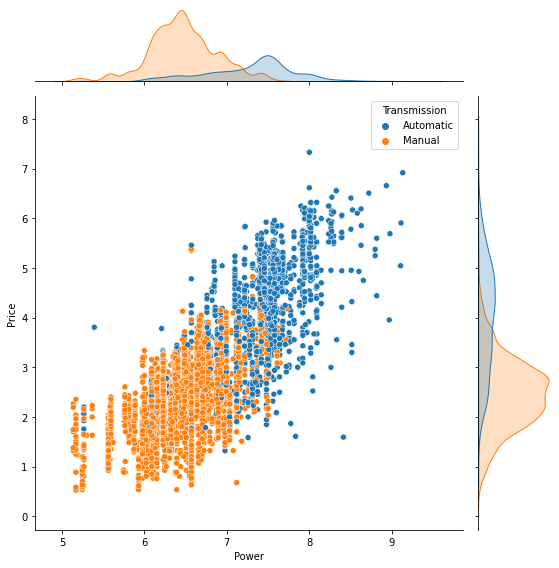

In [33]:
sns.jointplot(data=df_cars, x='Power', y='Price', hue='Transmission', height=8)


1. Automatic transmission cars have higher power
2. Automatic cars are usually expensive compared to Manual

##### Power vs Price vs Brand

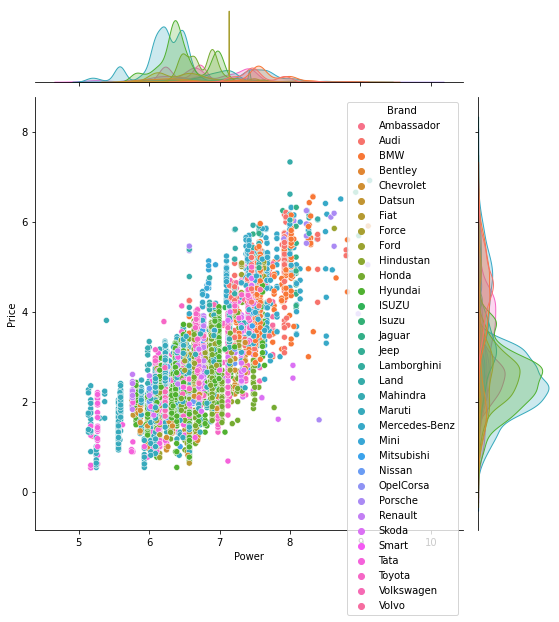

In [34]:
sns.jointplot(data=df_cars, x='Power', y='Price', hue='Brand', height=8)

##### Price vs Mileage vs Fuel_Type

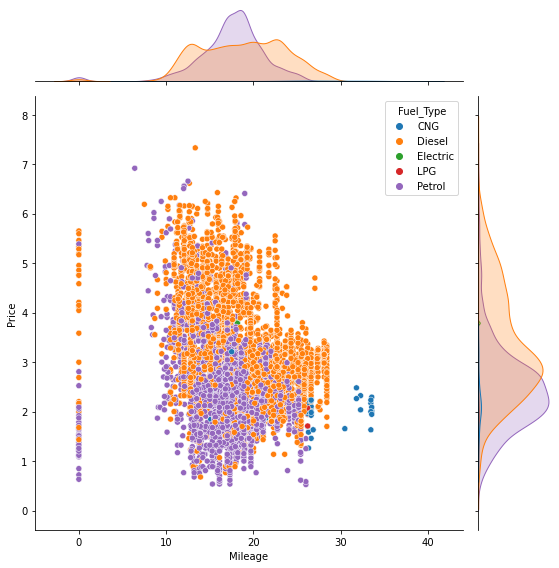

In [35]:
sns.jointplot(data=df_cars, x='Mileage', y='Price', hue='Fuel_Type', height=8)

1. Diesel cars tend to have higher mileage
2. I don't see any correlation between Mileage and Price.

##### Power vs Mileage vs Transmission

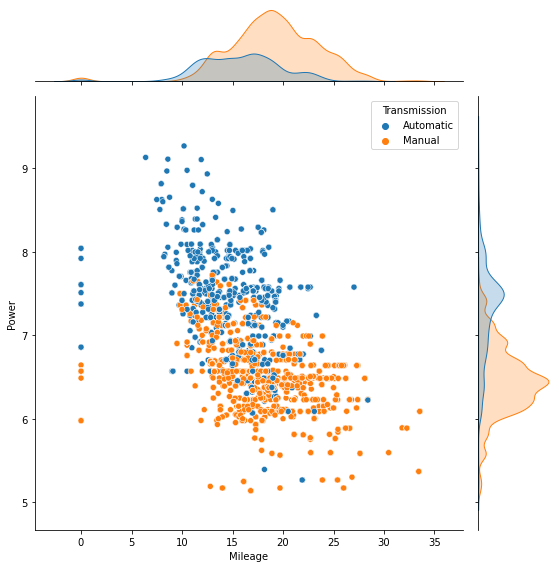

In [36]:
sns.jointplot(data=df_cars, x='Mileage', y='Power', hue='Transmission', height=8)

1. There seems to be some negative correlation between Power and Mileage. For cars with less Mileage, the power is more. 

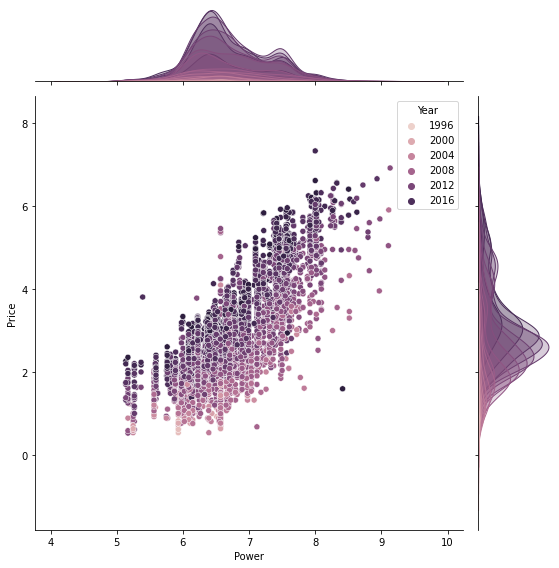

In [37]:
sns.jointplot(data=df_cars, x='Power', y='Price', hue='Year', height=8)

1. The cars bought in 2016-2019 seems to be having higher price. 

In [38]:
# Binning - Creating columns for cars bought between 2018-2019, 2016-2017, 2013-2015, 2008-2012, 2004-2007, <=2003
df_cars['Year_binned'] = pd.cut(df_cars['Year'], [1996, 2003, 2007, 2012, 2015, 2017, 2019],
                               labels=['<=2003', '2004-2007', '2008-2012', '2013-2015', '2016-2017', '2018-2019'])
df_cars.drop(['Year'], axis =1, inplace=True)

In [39]:
df_cars.sample(n=5)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Year_binned
556,Toyota Etios Liva GD,Chennai,5.252855,Diesel,Manual,First,23.59,10.414685,6.088311,5.0,2.263034,Toyota,2013-2015
4891,Hyundai i10 Era,Coimbatore,4.818279,Petrol,Manual,First,19.81,10.086136,6.109570,5.0,2.134221,Hyundai,2013-2015
2088,Honda City i-VTEC V,Delhi,4.826282,Petrol,Manual,First,17.40,10.548822,6.886306,5.0,2.321928,Honda,2008-2012
2781,Maruti Alto LXi,Kolkata,4.581244,Petrol,Manual,First,19.70,9.638436,5.563768,5.0,1.350497,Maruti,2008-2012
4028,Mercedes-Benz CLA 200 CGI Sport,Delhi,4.602071,Petrol,Automatic,First,15.04,10.960002,7.523562,5.0,4.672425,Mercedes-Benz,2016-2017


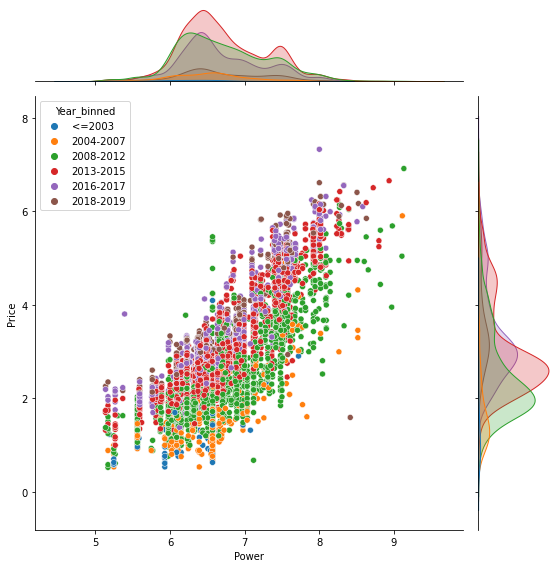

In [40]:
sns.jointplot(data=df_cars, x='Power', y='Price', hue='Year_binned', height=8)

##### Does city of purchase really matter?

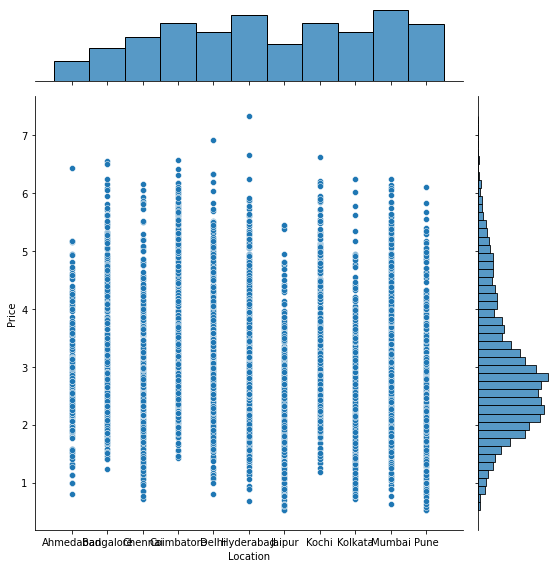

In [41]:
sns.jointplot(data=df_cars, x='Location', y='Price', height=8)

1. At first glance, location of purchase doesn't seem to matter much

##### Price vs Kilometers_Driven

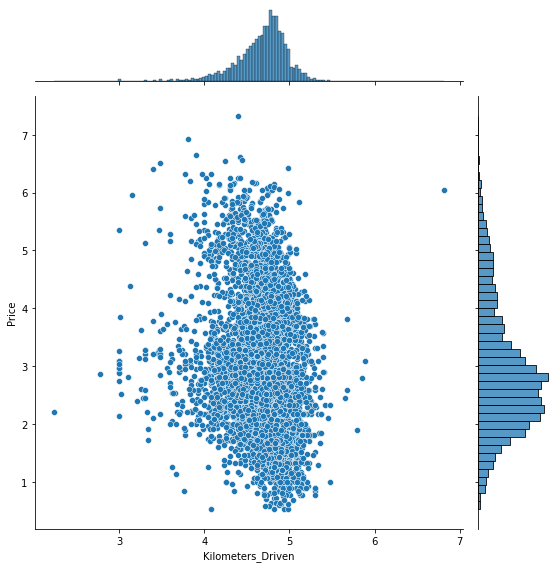

In [42]:
sns.jointplot(data=df_cars, x='Kilometers_Driven', y='Price', height=8)

1. Price tends to be higher if Kilometers_Driven is lower

##### Seats vs Price

<AxesSubplot:xlabel='Seats', ylabel='Price'>

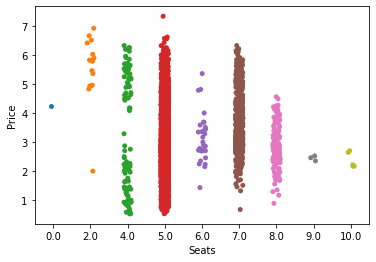

In [43]:
sns.stripplot(data=df_cars, x='Seats', y='Price')

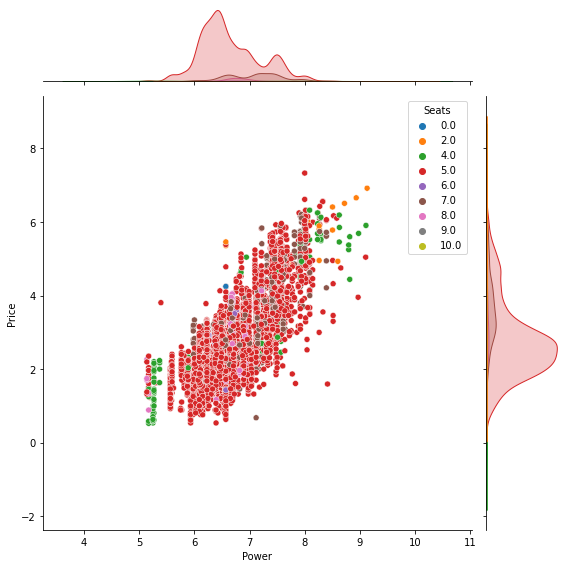

In [44]:
sns.jointplot(data=df_cars, x='Power', y='Price', hue='Seats', height=8)

1. Seats = 5 is dominating. Quick observation shows that some cars with Seats=4 and Seats=2 have higher price and power. 

##### Type of ownership vs Price

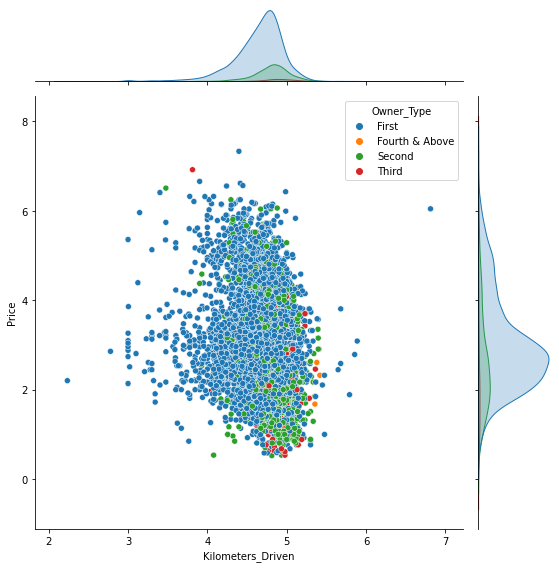

In [45]:
sns.jointplot(data=df_cars, x='Kilometers_Driven', y='Price', hue='Owner_Type', height=8)

It looks like if the owner type is First or second, it doesn't make much difference if the Kilomerers_Driven is less. Owner type Fourth&Above cars seems to be cheap

## Data Modeling

### Outlier Treatment

In [46]:
# Treat outliers by flooring and capping
def treat_outlier(df, col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    cap = Q3 + 1.5*IQR
    floor = Q1 - 1.5*IQR
    df[col] = np.clip(df[col], floor, cap) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                           # and all the values above upper_whishker will be assigned value of upper_whishker

def treat_all_outliers(df):
    num_col = df.select_dtypes(include=np.number).columns.tolist()
    for col in num_col:
        treat_outlier(df, col)
    return df

In [47]:
df_cars = treat_all_outliers(df_cars)

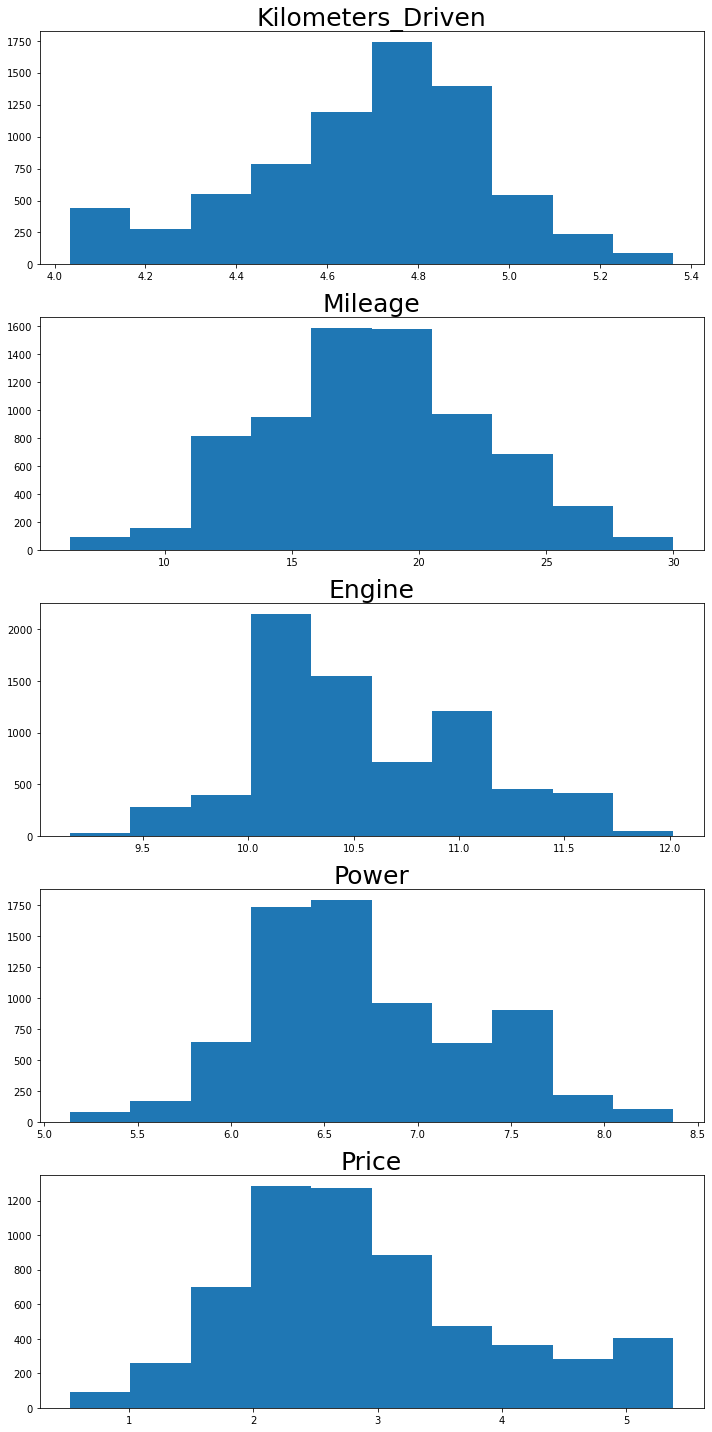

In [48]:
# plot the distributions now
numeric_col = df_cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10,20))
for i in range(len(numeric_col)):
    plt.subplot(5,1,i+1)
    plt.hist(df_cars[numeric_col[i]])
    plt.tight_layout()
    plt.title(numeric_col[i],fontsize=25)
    
plt.show() 

In [49]:
# There are some missing values in Price column. Let's remove those rows
df_cars.drop(df_cars.index[df_cars['Price'].isna()], axis=0, inplace=True)

In [50]:
# Drop the location column since we didn't see much value during the visualization step. 
df_cars.drop(['Location'], axis=1, inplace=True)

In [51]:
# Drop the name column
df_cars.drop(['Name'], axis=1, inplace=True)

### Encoding categorical variables

In [52]:
categorical_var = df_cars.select_dtypes(include="category").columns.to_list()
categorical_var
df_cars = pd.get_dummies(df_cars, drop_first=True, columns=categorical_var)

In [53]:
df_cars.sample(n=10)

,Kilometers_Driven,Mileage,Engine,Power,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Year_binned_2004-2007,Year_binned_2008-2012,Year_binned_2013-2015,Year_binned_2016-2017,Year_binned_2018-2019
5864,4.845104,19.60,10.513728,6.774128,3.209453,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5154,4.336500,23.10,9.964341,6.088311,2.130931,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3512,4.790960,17.80,10.227616,6.454505,2.707083,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3095,4.755882,22.54,10.448116,6.487519,2.877744,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2309,4.447174,14.62,10.965784,7.237640,3.897240,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5746,4.623260,17.92,10.086136,5.979568,1.292782,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
542,4.642474,22.54,10.448116,6.487519,2.954196,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3675,4.812920,22.90,10.286558,6.228819,2.292782,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2579,4.706624,17.00,10.086136,6.569856,1.104337,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1786,4.919083,16.07,10.962896,7.507795,3.781360,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Feature scaling


In [54]:
# using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cars_norm = scaler.fit_transform(df_cars)

In [55]:
df_cars_norm = pd.DataFrame(data=df_cars_norm, columns=df_cars.columns)

### Linear Regression

In [56]:
# Prepare the data
#Defining X and y variables
X = df_cars_norm.drop(['Price'], axis=1)
y = df_cars_norm[['Price']]

In [57]:

#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression().fit(X_train, y_train)

In [59]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
coef_df['Coefficients'] = coef_df['Coefficients'].apply(lambda x: "{:.6f}".format(x))
print(coef_df)

                          Coefficients
Kilometers_Driven            -0.067010
Mileage                      -0.054129
Engine                        0.099866
Power                         0.405246
Fuel_Type_Diesel              0.054711
Fuel_Type_Electric            0.396649
Fuel_Type_LPG                 0.025842
Fuel_Type_Petrol             -0.007271
Transmission_Manual          -0.036294
Owner_Type_Fourth & Above    -0.042704
Owner_Type_Second            -0.016419
Owner_Type_Third             -0.039972
Seats_2.0                    -0.136612
Seats_4.0                    -0.155871
Seats_5.0                    -0.199213
Seats_6.0                    -0.166465
Seats_7.0                    -0.144394
Seats_8.0                    -0.157650
Seats_9.0                    -0.208860
Seats_10.0                   -0.143182
Brand_Audi                    0.121575
Brand_BMW                     0.105794
Brand_Bentley                 0.000000
Brand_Chevrolet              -0.132220
Brand_Datsun             

### Model performance

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [62]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, X_train, y_train))

Training Performance

      RMSE       MAE       R^2  Adjusted R^2
0  0.06364  0.049629  0.912114      0.910909


In [63]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, X_test, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.070284  0.052689  0.897836      0.894505


### Observation from Model performance

- The training and testing RMSE are 0.063 and 0.07 respectively, and both scores are comparable. Hence, the model is a good fit.(not overfitting or underfitting)

- R2_score is 0.912, that explains 91.2% of total variation in the dataset. So, overall the model is very satisfactory.

## Testing the assumptions of linear regression

1. **No Multicollinearity**
2. **Mean of residuals should be 0**
3. **No Heteroscedacity**
4. **Linearity of variables**
5. **Normality of error terms**

### Let's check Multicollinearity using VIF scores

### 1. TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βkis “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [64]:
X1 = X.copy()
X1.head()

,Kilometers_Driven,Mileage,Engine,Power,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Year_binned_2004-2007,Year_binned_2008-2012,Year_binned_2013-2015,Year_binned_2016-2017,Year_binned_2018-2019
0,0.620487,0.856872,0.283027,0.231722,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.436252,0.564713,0.515027,0.573376,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.473901,0.502740,0.375420,0.417486,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.682404,0.611088,0.395591,0.417784,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.433608,0.376265,0.625000,0.621870,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1.sort_values(ascending=False)))

Series before feature selection: 

Seats_5.0                    2583.811531
Brand_Maruti                  653.713833
Brand_Hyundai                 598.384169
Seats_7.0                     346.843968
Brand_Honda                   330.742633
Brand_Toyota                  224.443604
Brand_Mercedes-Benz           172.856023
Brand_Volkswagen              170.936880
Brand_Ford                    162.966776
Brand_Mahindra                148.509431
Brand_BMW                     145.797051
Brand_Audi                    127.416027
Engine                        114.597549
Brand_Tata                    101.427379
Brand_Skoda                    94.516468
Brand_Renault                  79.155767
Power                          73.706721
Seats_8.0                      69.907860
Brand_Chevrolet                66.285384
Fuel_Type_Diesel               60.934669
Fuel_Type_Petrol               53.587857
Seats_4.0                      51.615237
Year_binned_2013-2015          51.491785
Brand_Nissan          

#### The high VIF score candidates are Brand dummies. Since some Brand dummies VIF score is less than 5, we would like to keep all the Brand dummies. It doesn't make sense to remove a few and keep a few. 

#### On the other hand, all the Seats dummies have large VIF score. Let's remove the Seats variables and check the adjusted R^2 value.

In [66]:
# Method to drop all the multicollinear columns and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []
    rmse_train_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        
        model = LinearRegression(fit_intercept=False)
        model.fit(train, y_train)
        y_pred_train_Price = model.predict(train)
        # Adj R-Sq
        adj_rsq_scores.append(adj_r2(train, y_train, y_pred_train_Price))
        # RMSE (Train data)
        rmse_train_data.append(np.sqrt(mean_squared_error(y_pred_train_Price, y_train)))
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        rmse_test_data.append(np.sqrt(mean_squared_error(y_pred_test_Price, y_test_Price)))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Train RMSE": rmse_train_data,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)

In [67]:
high_vif_columns = ["Seats"]

treating_multicollinearity(high_vif_columns, X_train, X_test, y_train, y_test)

     col  Adj_rsq_after_dropping_col  Train RMSE  Test RMSE
0  Seats                    0.907445    0.064928   0.072076


##### The adjusted R^2 score dropped from 0.912 to 0.907 which is not too bad. RMSE value remains the same

In [68]:
# Dropping Seats column and calculate VIF again

X_train1 = X_train.loc[:, ~X_train.columns.str.startswith('Seats')]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith('Seats')]
vif_series2 = pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index=X_train1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2.sort_values(ascending=False)))

Series before feature selection: 

Brand_Maruti                 75.184505
Brand_Hyundai                71.176508
Brand_Honda                  40.687115
Year_binned_2013-2015        33.005459
Fuel_Type_Petrol             29.638953
Brand_Toyota                 28.864191
Fuel_Type_Diesel             28.795296
Year_binned_2008-2012        28.135997
Year_binned_2016-2017        26.092971
Brand_Ford                   20.819465
Brand_Volkswagen             20.741258
Brand_Mercedes-Benz          20.642382
Brand_Mahindra               18.693741
Brand_BMW                    18.108001
Brand_Audi                   15.660115
Brand_Skoda                  12.256040
Brand_Tata                   12.189013
Engine                       11.623085
Year_binned_2018-2019         9.756054
Brand_Renault                 9.438600
Power                         8.662439
Brand_Chevrolet               8.427403
Brand_Nissan                  6.954809
Year_binned_2004-2007         6.714638
Brand_Land                   

##### In the second iteration, Year_binned dummies are showing high VIF. Let's drop the Year_binned dummies and check the adjusted r^2 and RMSE

In [69]:
# Drop Year dummies and verify new RMSE and adjusted R2
high_vif_columns = ["Year"]

X_train2 = X_train1.copy()

X_test2 = X_test1.copy()


treating_multicollinearity(high_vif_columns, X_train2, X_test2, y_train, y_test)

    col  Adj_rsq_after_dropping_col  Train RMSE  Test RMSE
0  Year                    0.824818    0.089379   0.093885


#### The adjusted R^2 score dropped from 0.907 to 0.83 which is bad. RMSE value jumps from 0.064 to 0.089. 

#### Since the change is unsatisfactory, we would like to retain year dummies

#### Moving on to next iteration.....

#### Engine and Power have high VIF score, 11.6 and 8.6 respectively. This also makes sense because they have a correleation of 0.9 with each other. Let's try to remove one of the columns and verify adjusted r2

In [70]:
high_vif_columns = ["Engine", "Power"]

treating_multicollinearity(high_vif_columns, X_train2, X_test2, y_train, y_test)

      col  Adj_rsq_after_dropping_col  Train RMSE  Test RMSE
0  Engine                    0.906217    0.065365   0.073289
1   Power                    0.895275    0.069073   0.075657


####  Dropping Power would have the maximum impact on predictive power of the model (amongst the variables being considered)
#### By dropping Engine, the adjusted R^2 score dropped from 0.907 to 0.906 which is not too bad. RMSE value doesn't increase much too.
#### We'll drop Engine variable and check the vif again

In [71]:
# Dropping Seats column and calculate VIF again

X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith('Engine')]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith('Engine')]
vif_series3 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3.sort_values(ascending=False)))

Series before feature selection: 

Brand_Maruti                 67.691166
Brand_Hyundai                64.545267
Brand_Honda                  36.388609
Year_binned_2013-2015        33.002277
Fuel_Type_Petrol             29.195123
Fuel_Type_Diesel             28.755444
Year_binned_2008-2012        28.122406
Year_binned_2016-2017        26.090515
Brand_Toyota                 24.120786
Brand_Volkswagen             18.644958
Brand_Mercedes-Benz          18.508968
Brand_Ford                   18.379708
Brand_BMW                    16.536364
Brand_Mahindra               15.982874
Brand_Audi                   14.267179
Brand_Tata                   11.015586
Brand_Skoda                  10.928414
Year_binned_2018-2019         9.752223
Brand_Renault                 8.674414
Brand_Chevrolet               7.729961
Year_binned_2004-2007         6.709964
Brand_Nissan                  6.225659
Brand_Land                    4.002534
Power                         3.991413
Brand_Jaguar                 

#### As a final check, let's also drop Brand dummies and verify the change in adjusted R2

In [72]:
high_vif_columns = ["Brand"]

X_train3 = X_train2.copy()

X_test3 = X_test2.copy()

treating_multicollinearity(high_vif_columns, X_train3, X_test3, y_train, y_test)

     col  Adj_rsq_after_dropping_col  Train RMSE  Test RMSE
0  Brand                    0.852542    0.082277   0.087833


#### After removing Brand, we see a significant drop in adjusted r2  to 0.85 and also a significant increase in RMSE. We would like to retain Brand variable to not compromise the predictive performance.

In [73]:
lin_reg_model1 = LinearRegression(fit_intercept=True)
lin_reg_model1.fit(X_train2,y_train)

print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train2, y_train))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.065365  0.050898  0.907285      0.906217


**Now we'll check rest of the assumptions on new model - lin_reg_model1**

### 2. MEAN OF RESIDUALS SHOULD BE 0

In [74]:
# predicted values
fitted = lin_reg_model1.predict(X_train2)
residual = fitted - y_train.values

np.mean(residual)

-1.0034961494831703e-16

* Mean of redisuals is very close to 0.

### 3. TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity. Ideally the points should be symmetrically distributed around horizontal line.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

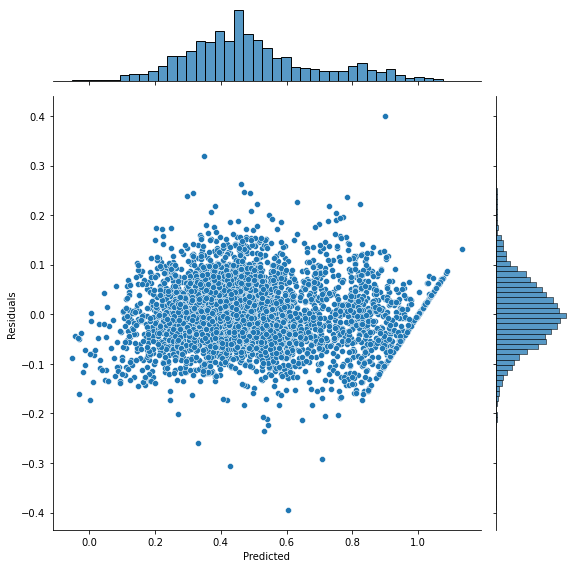

In [75]:
residuals_df = pd.DataFrame({'Residuals' : residual.flatten(), 'Predicted': fitted.flatten()})
residuals_df.head()
sns.jointplot(data=residuals_df, x='Predicted', y='Residuals', height=8)

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual plot, hence assumption is satisfied.

The linear pattern on the right side of the graph is expected because of the way we handled outliers. We capped the outliers to Q3+1.5*IQR

### 4. TEST FOR HOMOSCEDASTICITY

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.
* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**As seen before, no pattern is observed in residual plot. Hence, this assumption is satisfied**

### 5. TEST FOR NORMALITY

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

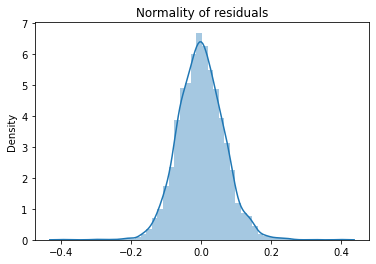

In [76]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

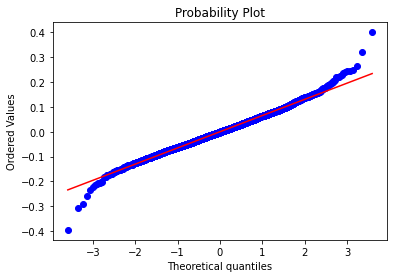

In [77]:
import pylab
import scipy.stats as stats
stats.probplot(residual.flatten(),dist="norm",plot=pylab)
plt.show()

**As per QQ plot they are approximately normal. So, this assumption is also satisfied.**

**Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part**

### Predicting on the test data

In [78]:
lin_reg_model_final = LinearRegression(fit_intercept=False)
X_train2['constant'] = 1
X_test2['constant'] = 1
lin_reg_model_final.fit(X_train2,y_train)


LinearRegression(fit_intercept=False)

In [79]:
y_pred = lin_reg_model_final.predict(X_test2)

**Checking the performance on train and test**

In [80]:
print('Training Performance\n')
print(model_perf(lin_reg_model_final, X_train2, y_train))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.065365  0.050898  0.907285      0.906194


In [81]:
print('Test Performance\n')
print(model_perf(lin_reg_model_final, X_test2, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.072754  0.054369  0.890527      0.887473


* **RMSE for both train and test set seem to be low. They are also comparable with each other which reperesents that the model is not suffering from underfitting or overfitting**


In [82]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(lin_reg_model_final.coef_.flatten(), \
                       index=X_train2.columns.tolist(), columns=['Coefficients'])
coef_df['Coefficients'] = coef_df['Coefficients'].apply(lambda x: "{:.6f}".format(x))
print(coef_df)

# model performance
print('\n\nTraining Performance\n')
print(model_perf(lin_reg_model_final, X_train2, y_train))

                          Coefficients
Kilometers_Driven            -0.069150
Mileage                      -0.114944
Power                         0.475138
Fuel_Type_Diesel              0.050948
Fuel_Type_Electric            0.318136
Fuel_Type_LPG                 0.006663
Fuel_Type_Petrol             -0.028983
Transmission_Manual          -0.035206
Owner_Type_Fourth & Above    -0.051210
Owner_Type_Second            -0.016431
Owner_Type_Third             -0.040337
Brand_Audi                    0.112581
Brand_BMW                     0.093501
Brand_Bentley                 0.000000
Brand_Chevrolet              -0.131522
Brand_Datsun                 -0.142648
Brand_Fiat                   -0.125212
Brand_Force                  -0.095210
Brand_Ford                   -0.062330
Brand_Hindustan              -0.000000
Brand_Honda                  -0.065819
Brand_Hyundai                -0.061266
Brand_ISUZU                  -0.115984
Brand_Isuzu                  -0.014606
Brand_Jaguar             

### Observations
Now this is our final model which follows all the assumptions and this can be used for interpretations

1. We can see that expensive brands such as Porsche, Lamborghini, Land, Mini and Jaguar tend to have a higher resale value
2. Electric cars tend to sale for a higher price. Electric cars might have a great resale value
3. Price of the car tend to be generally higher if the Power/Engine capacity is high
4. As expected, Cars purchases in recent years have high resale value. Especially, cars purchases in the last 2-3 years have a high resale value.